## Netflix Data Analysis

#### Netflix is one of the largest providers of online streaming services. It collects a huge amount of data because it has a very large subscriber base. In this article, I’m going to introduce you to a data science project on Netflix data analysis with Python.

#### We can analyze a lot of data and models from Netflix because this platform has consistently focused on changing business needs by shifting its business model from on-demand DVD movie rental and now focusing a lot about the production of their original shows.

#### Some of the most important tasks that we can analyze from Netflix data are:

1. Understand what content is available
2. Understand the similarities between the content
3. Understand the network between actors and directors
4. What exactly Netflix is focusing on
5. Sentiment analysis of content available on Netflix.

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob


In [13]:
df = pd.read_csv('netflix_titles.csv')

Checking for Number of Rows and Columns in Dataset

In [14]:
df.shape 

(8807, 12)

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


List of Columns

In [16]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Distribution of Content

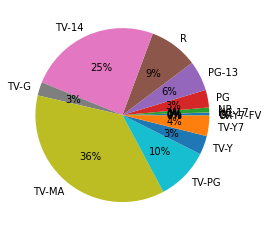

In [33]:
z = df.groupby(['rating']).size().reset_index(name='counts')
colors = sns.color_palette('bright')
plt.pie(z['counts'],labels=z['rating'],autopct='%.0f%%')
plt.show()


The graph above shows that the majority of content on Netflix is categorized as “TV-MA”, which means that most of the content available on Netflix is intended for viewing by mature and adult audiences.

#### Top 5 Actors and Directors

In [40]:
df['director'] = df['director'].fillna('No Director Specified') # Fill Blank Values with 'No Director Specified'
filtered_director = pd.DataFrame()
filtered_director = df['director'].str.split(',',expand=True).stack()
filtered_director = filtered_director.to_frame()
filtered_director.columns = ['Director'] # Give name of Columns

In [41]:
Director = filtered_director.groupby(['Director']).size().reset_index(name='Total Content')
Director = Director[Director.Director != 'No Director Specified']
Director = Director.sort_values(by=['Total Content'],ascending=False)

In [42]:
Top5Director = Director.head()
Top5Director = Top5Director.sort_values(by=['Total Content'])

[Text(0.5, 1.0, 'Top 5 Director on Netflix')]

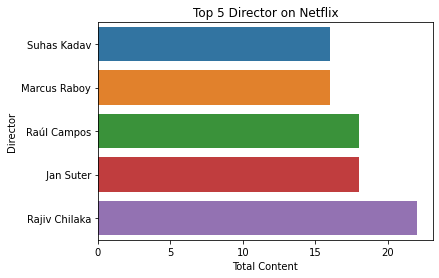

In [44]:
sns.barplot(data=Top5Director,x='Total Content',y='Director').set(title='Top 5 Director on Netflix')

[Text(0.5, 1.0, 'Top 5 Actor on Netflix')]

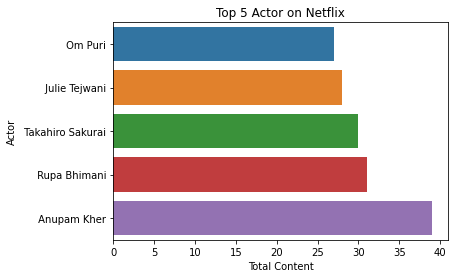

In [45]:
df['cast'] = df['cast'].fillna('No Actor Specified') # Fill Blank Values with 'No Actor Specified'
filtered_cast = pd.DataFrame()
filtered_cast = df['cast'].str.split(',',expand=True).stack()
filtered_cast = filtered_cast.to_frame()
filtered_cast.columns = ['Actor'] # Give name of Columns

Actor = filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
Actor = Actor[Actor.Actor != 'No Actor Specified']
Actor = Actor.sort_values(by=['Total Content'],ascending=False)

Top5Actor = Actor.head()
Top5Actor = Top5Actor.sort_values(by=['Total Content'])

sns.barplot(data=Top5Actor,x='Total Content',y='Actor').set(title='Top 5 Actor on Netflix')

#### Analyzing Content on Netflix

The next thing to analyze from this data is the trend of production over the years on Netflix:

In [46]:
df1 = df[['type','release_year']]
df1 = df1.rename(columns={"release_year":"Release Year"})
df2 = df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2 = df2[df2['Release Year']>=2010]

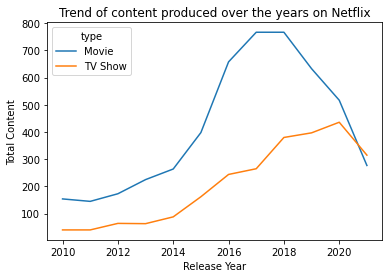

In [50]:

fig = sns.lineplot(data=df2,x='Release Year',y='Total Content',hue='type').set(title='Trend of content produced over the years on Netflix')

The above line graph shows that there has been a decline in the production of the content for both movies and other shows since 2018.

#### At last, to conclude our analysis, I will analyze the sentiment of content on Netflix:

In [54]:
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]

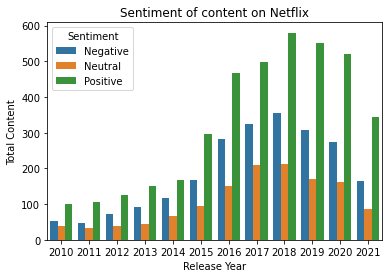

In [58]:
fig2 = sns.barplot(data=dfx,x='Release Year',y='Total Content',hue='Sentiment').set(title='Sentiment of content on Netflix')


So the above graph shows that the overall positive content is always greater than the neutral and negative content combined.